# Project: Wrangling and Analyzing Weratedogs Twitter Data

## Table of Content
<li><a href='#introduction'>Introduction</a></li>
<li><a href='#gathering'>Data Gathering</a></li>
<li><a href='#assessing'>Assessing Data</a></li>
<li><a href='#cleaning'>Cleaning Data</a></li>
<li><a href='#analyzing'>Analyzing and Visualizing Data</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<a id='introduction'></a>
## Introduction

In this project we will be gathering data from a different of sources and in various formats, assess its quality and tidiness, then clean it. We will then analyze the cleaned data to get useful insights from it. The dataset that we will be using for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This is a Twitter account that rates people's dogs with a humorous comment about the dog. We will finding dog species with the most twitter engagement and other insights that could be gotten during the analysis process.

<a id='gathering'></a>
## Data Gathering
In this section we are going to;
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) which will be downloaded from udacity classroom
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

We would start by importing the required libraries

In [1]:
import pandas as pd

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Download the tweet image prediction (image_predictions.tsv) using request library

In [3]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
r.headers.get('content-type')
open('img_prediction.tsv', 'wb').write(r.content)

ConnectionError: HTTPSConnectionPool(host='d17h27t6h515a5.cloudfront.net', port=443): Max retries exceeded with url: /topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002D5815EA220>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [4]:
img_prediction_df=pd.read_table('img_prediction.tsv')
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Query additional data(retweet count and favorite count) via the Twitter API using tweepy (tweet_json.txt)

In [11]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
import tweepy
from tweepy import OAuth1UserHandler
import json


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
# Extract retweet and favourite count from tweet_json.txt
file1 = open('tweet_json.txt', 'r')
Lines = file1.readlines()

tweet_id=[]
retweet_count=[]
favorite_count=[]
boolean=[]
for i in Lines:
    data = json.loads(i)
    tweet_id.append(data['id'])
    retweet_count.append(data['retweet_count'])
    favorite_count.append(data['favorite_count'])

In [14]:
# Create new dataframe for the extracted data
tweet_data=pd.DataFrame({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})   
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7763,35313
...,...,...,...
2318,666049248165822465,37,89
2319,666044226329800704,115,247
2320,666033412701032449,36,100
2321,666029285002620928,39,112


<a id='assessing'></a>
## Assessing Data
In this section, we will visually and programatically assess the gathered data for quality and tidiness issues. Let's start with **twitter-archive-enhanced.csv** data. 



In [15]:
# Load twitter-archive-enhanced.csv data
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Assessing the data visually, We observe there are missing values in the following columnns;
1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp

The dog categories can be fused to one column 'dog category' to make it more tidy. We also observe the 'None' values in these columns.

We also observe that in the 'name' column we have dog name as 'a' from index 2352-2354, which seems to not be right as the corresponding tweet text doesnt have a name.


In [16]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


We can notice other dog names like an and the. These dog These dogs name seems to extracted using the third word of the tweet text if it is preceded by 'is'. These names also seem not to be capitalized. We can further check for non Capitalized names in the columns programmatically.

In [17]:
# Check for names which are not capitalized in the name column
WrongNames=[]
for i in twitter_archive['name']:
    if i.islower() and i not in WrongNames:
        WrongNames.append(i)
WrongNames 

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

We can observe that these names are not dog names.

We will then further assess the data, using the info function.

In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

We can confirm that there are missing values in the columns observed visually.

- Timestamp column has a wrong datatype, it should be a datetime
- The dog category has no missing value but from the visual assessment, we see None values

- As instructed in this project specification, we only want original ratings (no retweets or replies). Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp all have some values as showed in the .info() function. These means these rows holds tweet that are retweeted or are in response to another tweet.


In [19]:
# Summary statistics of all attributes in the twitter_archive dataframe.
twitter_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


- **name** has missing values(None) of about 745
- **rating_numerator** and **rating_denominator** seem to have out of range maximum values of 1776 and 170 respectively. We will check the distribution of their values using value_counts.

##### create a column for rating, which will be gotten by dividing rating_numerator and rating_denominator and then check the distribution.

In [20]:
twitter_archive['rating']=twitter_archive['rating_numerator']/twitter_archive['rating_denominator']

In [21]:
twitter_archive['rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        2
7.500000        2
1.500000        2
42.000000       2
0.818182        2
177.600000      1
0.636364        1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
Name: rating, dtype: int64

Some ratings seems to be out of range, like 177.6,66.6, amongst others.

#### Assessing **img_prediction.tsv** data

In [22]:
# Reading the img_prediction.tsv data
img_prediction_df=pd.read_table('img_prediction.tsv')
img_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Looking at the data, we can observe that;
- The closest prediction, p1, show that some predictions are false(like on index 2074) which means, the image doesn't depict a dog
- The number of rows present here is 2075 which is lesser than the twitter-enhanced data which shows some missing predictions for the tweet IDs given in the twitter enhanced data. 
- p1 should be given a more comprehensive name like predicted dog specie.

We can confirm these programmatically by using the describe function

In [23]:
img_prediction_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


Assesing programmatically confirms that p1_dog have about 500 False values for dogs.

In [24]:
# Check for duplicates
img_prediction_df.duplicated().sum()

0

In [25]:
# Check for duplicates in the image url column as it should be unique to each prediction
img_prediction_df.jpg_url.duplicated().sum()

66

#### Assessing  **tweet_data** dataframe holding the extracted retweet count and favorite count

In [26]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33820
1,892177421306343426,5302,29336
2,891815181378084864,3481,22060
3,891689557279858688,7227,36946
4,891327558926688256,7763,35313
...,...,...,...
2318,666049248165822465,37,89
2319,666044226329800704,115,247
2320,666033412701032449,36,100
2321,666029285002620928,39,112


- We observe 2323 rows which is less than twitter enhanced data that was used to extract these data. It could be as a results of deleted tweets.

In [27]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2323 non-null   int64
 1   retweet_count   2323 non-null   int64
 2   favorite_count  2323 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


<a id='q-issues'></a>
### Quality issues

###### In twitter-archive-enhanced.csv;
1. Values present in the following columnns depicts that those correspending tweets are either retweeted or are in response to a tweet;
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - retweeted_status_timestamp
   

2. 'name' column have incorrect dog names


3. timestamp column has a wrong datatype, it should be a datetime


4. The dog stages and dog names have None represented as missing values.


5. Some ratings seems to be outliers like 177.6,66.6, amongst others.



###### In img_prediction.tsv;

6. The closest prediction, p1, shows that some prediction is false meaning, the image doesnt depict a dog 

7. p1 should be given a more comprehensive name like predicted dog specie.

8. jpg_url column have duplicate values. 

9. Tweet IDs column is of integar data type (this issue applies to all three datasets)

10. All 3 datasets do not have consistent number of rows as they should due to missing values.


<a id='t-issues'></a>
### Tidiness issues
###### In twitter-archive-enhanced.csv;
11. The dog stages should be fused to one column to make it more tidy

12. Tweet ID is spread across all datasets, they should be merged by the Tweet IDs coomon to all.

<a id='cleaning'></a>
## Cleaning Data
In this section we will be cleaning, the data based on the gathered issues in the assessing data section.

In [28]:
twitter_archive_clean = twitter_archive.copy()
img_prediction_df_clean = img_prediction_df.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: 1. Values present in the following columnns depicts that those correspending tweets are either retweeted or are in response to a tweet;
   - in_reply_to_status_id
   - in_reply_to_user_id
   - retweeted_status_id
   - retweeted_status_user_id
   - retweeted_status_timestamp

#### Define: 
The rows with values in these columns should be dropped as they are not original tweets, then the columns will be dropped since they have no use anymore

#### Code

###### Dropping rows with  values

In [29]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull()]

In [30]:
# Dropping the columns
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test
Checking the data to check to see if columns have been dropped and number of rows have been changed from 2357

In [31]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,0.5
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,0.6
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,0.9
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,0.7


### Issue #2: 'name' column have incorrect dog names

#### Define: 
We can replace the dog names not capitalized to 'Nan' since the corresponding tweet text has no names for them 

#### Code

###### Replacing rows with dog names starting with lowercase

In [32]:
import numpy as np
mask = twitter_archive_clean.name.str.islower() 
column_name = 'name' 
twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test
Checking if dog name 'a' will appear in the value counts

In [33]:
twitter_archive_clean['name'].value_counts().index.sort_values() 

Index(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert',
       'Albus',
       ...
       'Yukon', 'Zara', 'Zeek', 'Zeke', 'Zeus', 'Ziva', 'Zoe', 'Zoey', 'Zooey',
       'Zuzu'],
      dtype='object', length=930)

Usually when we sort values alpahbetically, the capitalized letters are sorted first as shown below in the uncleaned data

In [34]:
twitter_archive['name'].value_counts().index.sort_values() 

Index(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert',
       'Albus',
       ...
       'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this',
       'unacceptable', 'very'],
      dtype='object', length=957)

### Issue #3: timestamp column has a wrong datatype, it should be a datetime

#### Define: 
The datatype should be changed from object to datetime 

#### Code
Changing timestamp column datatype to datetime

In [35]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test
##### Checking the basic infomation about the data to check for the datatypes of the columns

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  rating              2097 non-null 

### Issue #4 :The dog stages and dog names have None represented as missing values.

#### Define: 
We will replace 'None' value with Nan

#### Code

In [37]:
twitter_archive_clean = twitter_archive_clean.replace(['None'],np.nan)

#### Test

In [38]:
# Check the info of the data to confirm there are now missing values in the columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1390 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
 12  rating              2097 non-null 

### Issue #5: Some ratings seems to be outliers like 177.6,66.6, amongst others.

#### Define: 
We will check the distribution og the rating column using value counts and replace ratings with high values to the expected maximum values. 

#### Code

In [39]:
# View rating distribution
twitter_archive_clean['rating'].value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
7.500000        1
3.428571        1
0.000000        1
177.600000      1
0.818182        1
0.636364        1
2.600000        1
42.000000       1
Name: rating, dtype: int64

##### We would replace ratings above 2.0 with 1.7 and also replace the infinity value with 1.7

In [40]:
twitter_archive_clean.loc[twitter_archive_clean['rating'] > 2.0, 'rating'] = 1.7

#### Test

In [41]:
# View new rating distribution
twitter_archive_clean['rating'].value_counts()

1.200000    490
1.000000    438
1.100000    418
1.300000    287
0.900000    153
0.800000     98
0.700000     51
1.400000     38
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     10
1.700000      6
0.100000      4
0.000000      1
0.818182      1
0.636364      1
Name: rating, dtype: int64

### Issue #6: The closest prediction, p1, shows that some prediction is false which implies the image doesn't depict a dog.

#### Define: 
We will be using the closest prediction(p1) columns in our analysis, and we will drop rows that p1_dog is false. 

#### Code

##### Filter and get data by predictions which are dogs

In [42]:
img_prediction_df_clean=img_prediction_df_clean[img_prediction_df_clean['p1_dog']==True]

#### Test

In [43]:
# Confirm data is only for dog prediction by checking the unique values in the column
img_prediction_df_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #7: p1 and p1_conf  should be given a more comprehensive names.

#### Define: 
Renaming both columns to dog_specie and prediction_confidence respectively. 

#### Code

In [44]:
# Rename p1 and p1_conf columns to dog_specie and prediction_confidence respectively
img_prediction_df_clean.rename(columns = {'p1':'dog_specie', 'p1_conf':'prediction_confidence'}, inplace = True)

#### Test

In [45]:
# Confirm renamed columns 

img_prediction_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_specie', 'prediction_confidence',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #8: jpg_url column have duplicate values.

#### Define: 
Duplicates of image url should be dropped as there should be only one prediction per image. 

#### Code
 

In [46]:
# Drop duplicates in jpg_url column
img_prediction_df_clean.drop_duplicates(subset ="jpg_url",
                     keep = False, inplace = True)

#### Test

In [58]:
# Check for duplicate
img_prediction_df_clean.jpg_url.duplicated().unique()

array([False])

### Issue #10 & 13: All 3 datasets do not have consistent number of rows as they should due to missing values.

#### Define: 
Merging **twitter_archive_clean**, **img_prediction_df_clean** and **tweet_data** dataframes based on tweet IDs present in all of them and dropping columns with little or no significance. 

#### Code

###### Merge the three dataframes

In [59]:
merged_df = pd.merge(twitter_archive_clean, img_prediction_df_clean[['tweet_id', 'dog_specie', 'prediction_confidence']], on="tweet_id")
MasterTwitterEnhanced = pd.merge(merged_df, tweet_data, on="tweet_id")

# Drop columns not needed in the new MasterTwitterEnhanced dataframe
MasterTwitterEnhanced = MasterTwitterEnhanced.drop(['expanded_urls','rating_numerator','rating_denominator'], axis = 1)

#### Test

In [60]:
# Checking the new merged dataframe 
MasterTwitterEnhanced.head(3)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,dog_specie,prediction_confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN,1.3,Chihuahua,0.323581,5302,29336
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN,1.2,Chihuahua,0.716012,3481,22060
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN,1.2,basset,0.555712,7763,35313


### Issue #9: Tweet IDs column is of integar data type (this issue applies to all three datasets).

#### Define: 
Change 'tweet_id' column datatype from int to str

#### Code

In [61]:
# Change datatype from int to str
MasterTwitterEnhanced['tweet_id']= MasterTwitterEnhanced['tweet_id'].astype(str)

#### Test

In [62]:
# Check tweet_id column datatype 
MasterTwitterEnhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1402 non-null   object             
 1   timestamp              1402 non-null   datetime64[ns, UTC]
 2   source                 1402 non-null   object             
 3   text                   1402 non-null   object             
 4   name                   999 non-null    object             
 5   doggo                  52 non-null     object             
 6   floofer                8 non-null      object             
 7   pupper                 144 non-null    object             
 8   puppo                  20 non-null     object             
 9   rating                 1402 non-null   float64            
 10  dog_specie             1402 non-null   object             
 11  prediction_confidence  1402 non-null   float64          

### Issue #11: The dog stages should be fused to one column to make it more tidy

#### Define: 
Fuse the columns together.

#### Code

In [63]:
# Extract dog category from tweet text
dog_category=[]
for i in MasterTwitterEnhanced['text']:
    i=i.lower()
    if 'doggo' in i:
        dog_category.append('doggo')
    elif 'puppo' in i:
        dog_category.append('puppo')
    elif 'floofer' in i:
        dog_category.append('floofer')
    elif 'pupper' in i:
        dog_category.append('pupper')
    else:
        dog_category.append(np.nan)

# Create a dog category column
MasterTwitterEnhanced['dog_stage']=dog_category

# Drop previous dog category columns
MasterTwitterEnhanced = MasterTwitterEnhanced.drop(['floofer','puppo','pupper','doggo'], axis = 1)

#### Test

###### Check the head of the data to confirm the new column and the dropped columns

In [64]:
MasterTwitterEnhanced.head()

,tweet_id,timestamp,source,text,name,rating,dog_specie,prediction_confidence,retweet_count,favorite_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,1.3,Chihuahua,0.323581,5302,29336,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,Chihuahua,0.716012,3481,22060,NaN
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,1.2,basset,0.555712,7763,35313,NaN
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,1.3,Chesapeake_Bay_retriever,0.425595,2602,17815,NaN
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,Appenzeller,0.341703,1664,10369,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
MasterTwitterEnhanced.to_csv("twitter_archive_master.csv",index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, analysis and visualization of the wrangled data will be done.

In [138]:
# Top 15 frequent occuring dog species

DogBreed=MasterTwitterEnhanced.dog_specie.value_counts()[:15].index.tolist()

In [121]:
MasterTwitterEnhanced['month'] = MasterTwitterEnhanced['timestamp'].dt.month_name()
MasterTwitterEnhanced['year'] = MasterTwitterEnhanced['timestamp'].dt.year


###### Create column for Average engagement

In [71]:
MasterTwitterEnhanced['avrg_engagement']=(MasterTwitterEnhanced['retweet_count']+MasterTwitterEnhanced['favorite_count'])/2

In [140]:
newDf = MasterTwitterEnhanced["dog_specie"].isin(DogBreed)

###### Sort dog species according to their number of engagements

In [141]:
MasterTwitterEnhanced[newDf][['avrg_engagement','dog_specie']].groupby('dog_specie').mean().sort_values('avrg_engagement', ascending=False).style.background_gradient(cmap='copper')

,avrg_engagement
dog_specie,
French_bulldog,10140.620000
Samoyed,7021.319444
golden_retriever,6418.896825
Pembroke,5863.718391
Labrador_retriever,5761.098837
cocker_spaniel,5647.062500
Chesapeake_Bay_retriever,5640.195652
German_shepherd,5389.475000
chow,5345.565789


French bulldog is the most liked dog as it has the highest engagement count

###### Find dog gender from tweet text and append to a list

In [74]:
gender=[]
b=MasterTwitterEnhanced['text']
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
female=['shes','she','girl']
male=['he','hes','boy']
for i in b:
    i=i.lower()
    for ele in i:
        if ele in punc:
            i = i.replace(ele, "")
    h=i.split(' ')
    checkf = any(item in female for item in h)
    checkm = any(item in male for item in h)
    if checkf == True:
        gender.append('female')
    elif checkm == True:
        gender.append('male')
    else:
        gender.append('none')
            

###### Create new column for gender 

In [75]:
MasterTwitterEnhanced['gender']=gender
MasterTwitterEnhanced.head()

,tweet_id,timestamp,source,text,name,rating,dog_specie,prediction_confidence,retweet_count,favorite_count,dog_stage,month,year,avrg_engagement,gender
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,1.3,Chihuahua,0.323581,5302,29336,NaN,August,2017,17319.0,female
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,Chihuahua,0.716012,3481,22060,NaN,July,2017,12770.5,male
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,1.2,basset,0.555712,7763,35313,NaN,July,2017,21538.0,male
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,1.3,Chesapeake_Bay_retriever,0.425595,2602,17815,NaN,July,2017,10208.5,none
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,Appenzeller,0.341703,1664,10369,NaN,July,2017,6016.5,male


###### Sort dog gender based on average number of engagement

In [76]:
newDf = MasterTwitterEnhanced["gender"].isin(['male','female'])
MasterTwitterEnhanced[newDf][['avrg_engagement','gender']].groupby('gender').mean().sort_values('avrg_engagement').style.background_gradient(cmap='copper')

,avrg_engagement
gender,
male,4917.554896
female,5665.767635


Female dogs are more liked compared to male dogs based on the engagement count.

###### Sort dog stages based on average number of engagement

In [131]:
newDf = MasterTwitterEnhanced["dog_stage"].isin(['puppo','pupper','doggo','floofer'])
DogStage=MasterTwitterEnhanced[newDf][['avrg_engagement','dog_stage']].groupby('dog_stage').mean().sort_values('avrg_engagement')


In [132]:
DogStage=DogStage.reset_index()
DogStage.style.background_gradient(cmap='copper')

,dog_stage,avrg_engagement
0,pupper,4236.035714
1,floofer,7607.928571
2,doggo,11135.773585
3,puppo,12813.608696


In [127]:
MasterTwitterEnhanced['tweet source'] = MasterTwitterEnhanced.source.apply(lambda num : num[num.index('>')+1 :-4])

In [130]:
df2 = MasterTwitterEnhanced.groupby(['tweet source'])['tweet source'].count()
df2.reset_index(name='count').sort_values('count').style.background_gradient(cmap='copper')

,tweet source,count
0,TweetDeck,6
1,Twitter Web Client,18
2,Twitter for iPhone,1378


### Insights:
1. Eskimo dog is the most liked dog as it has the highest rating and retweet count and second highest favorite count

2. Female dogs are more liked compared to male dogs.

3. Top two liked dog stages are doggo and puppo based on engagement counts.

4. The user mostly tweets from his iphone

5. There is an average increase in the tweet engagement of WeRateDogs twitter user over the years

### Visualization

###### Represent  average number of engagement of dog species  on a bar plot

In [143]:
#Aggregate by mean engagement
new = MasterTwitterEnhanced["dog_specie"].isin(DogBreed)
DogBreeds=MasterTwitterEnhanced[new][['avrg_engagement','dog_specie']].groupby('dog_specie').mean().sort_values('avrg_engagement')
DogBreeds=DogBreeds.reset_index()

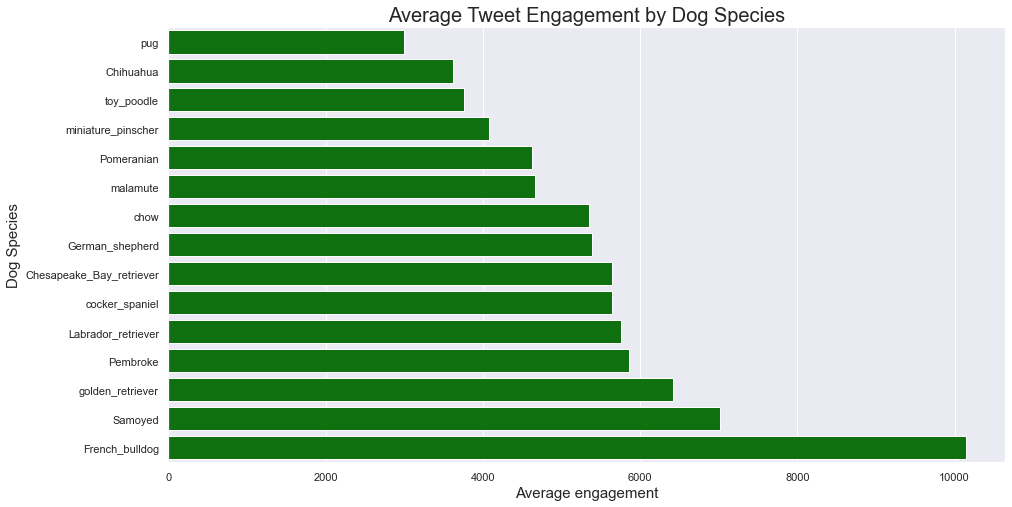

In [151]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(font_scale = 20)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="avrg_engagement", y="dog_specie", data=g, color ='green').set(title='Average Engagement by Dog species')
plt.ylabel('Dog Species',fontsize=15)
plt.xlabel('Average engagement',fontsize=15)
plt.title('Average Tweet Engagement by Dog Species',fontsize=20);

From the plot, we can further confirm that french bull dogs are the most liked based on engagement, Followed by Eskimo dogs.

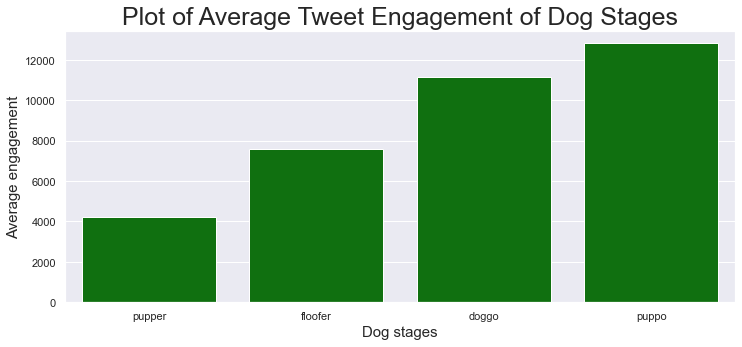

In [148]:
plt.figure(figsize=[12, 5])
sns.barplot(y='avrg_engagement',x='dog_stage',data=DogStage, color='Green')

plt.xlabel('Dog stages',fontsize=15)
plt.ylabel('Average engagement',fontsize=15)
plt.title('Plot of Average Tweet Engagement of Dog Stages',fontsize=25)
plt.show()

The plot shows Dog stages doggo and Puppo have the most engagements

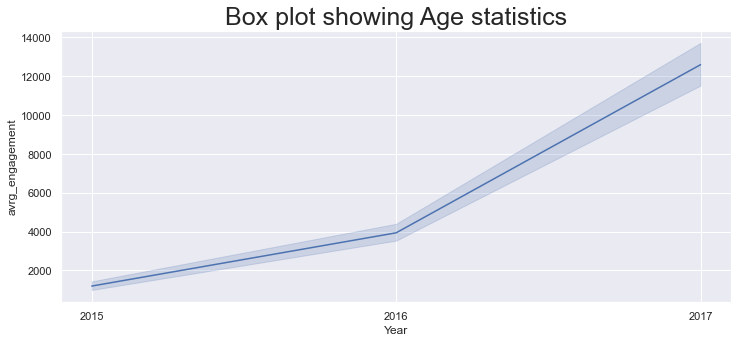

In [136]:
MasterTwitterEnhanced=MasterTwitterEnhanced.astype({"year": str})
MasterTwitterEnhanced=MasterTwitterEnhanced.sort_values(by='year')

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[12, 5])
sns.lineplot(y='avrg_engagement',x='year',data=MasterTwitterEnhanced)
plt.xlabel('Year')

plt.title('Box plot showing Age statistics',fontsize=25)
plt.show()

The is a progressive increase in tweets engagements over the years.

## Conclusion

<a id='conclusion'></a>
From our analysis, it is gathered that, people engage tweets related to french bulldogs the most and then eskimo dogs. This could be because of their adorability and cuteness. Also female dogs seems to be more liked and prefered to males. The doggo and puppo dog categories have more tweet engagement to the rests of the dog stages. Acroos the years the tweet user had a progressive increase in his tweet engagements.

## Limitation

The analysis on the tweets would have shown more insight if there were more data provided. Twitter doesnt give out user informations, hence it was not easy drilling down insights to users. Alot of missing data could not be filled out or dropped as they were needed to draw insights. Some columns meaning were not clear enough.